# Import Libraries

In [1]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

# Downloading pretrained model from Google

In [3]:
IMAGE_SHAPE=(224,224)
classifier=tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4',input_shape=IMAGE_SHAPE+(3,))
])

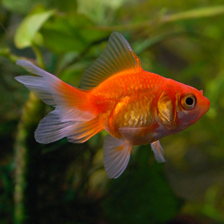

In [4]:
gold_fish=Image.open('/content/goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish=np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [7]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

# Predicting Goldfish using the downloaded model

In [8]:
result=classifier.predict(gold_fish[np.newaxis,...])

1/1 [==============================] - 8s 8s/step


In [9]:
result.shape

(1, 1001)

In [10]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [11]:
with open('/content/ImageNetLabels.txt','r') as f:
    image_labels=f.read().splitlines()

In [12]:
image_labels[2]

'goldfish'

# Downloading Data

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [14]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X=np.array(X)
y=np.array(y)

# Splitting data into train and test datasets

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0,)


# Scaling Datasets

In [20]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [21]:
X_train_scaled[0]

array([[[0.17254902, 0.19215686, 0.23137255],
        [0.18431373, 0.21960784, 0.23921569],
        [0.20784314, 0.24313725, 0.25490196],
        ...,
        [0.59215686, 0.65098039, 0.5254902 ],
        [0.61960784, 0.6627451 , 0.54901961],
        [0.67058824, 0.69411765, 0.59607843]],

       [[0.15686275, 0.19215686, 0.23137255],
        [0.16078431, 0.20392157, 0.21960784],
        [0.18039216, 0.22745098, 0.23529412],
        ...,
        [0.6627451 , 0.70588235, 0.59215686],
        [0.70588235, 0.73333333, 0.63137255],
        [0.74509804, 0.76470588, 0.6745098 ]],

       [[0.16078431, 0.20392157, 0.23921569],
        [0.15294118, 0.20392157, 0.21960784],
        [0.16862745, 0.21960784, 0.22745098],
        ...,
        [0.7372549 , 0.76862745, 0.67058824],
        [0.78039216, 0.79607843, 0.71372549],
        [0.80392157, 0.81176471, 0.7372549 ]],

       ...,

       [[0.85490196, 0.94901961, 0.93333333],
        [0.80392157, 0.91764706, 0.88235294],
        [0.74509804, 0

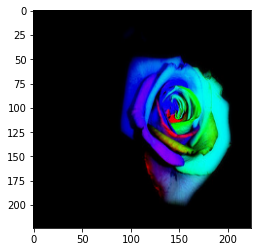

In [22]:
plt.imshow(X[0])

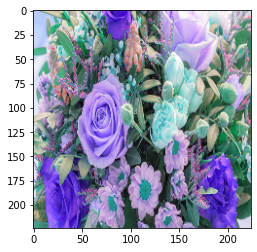

In [23]:
plt.imshow(X[1])

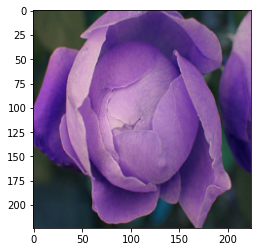

In [24]:
plt.imshow(X[2])

# Downloaded model making wrong predictions

In [25]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 1s 774ms/step


array([550, 722, 795])

In [26]:
image_labels[795]

'shower curtain'

In [27]:
image_labels[880]

'umbrella'

# Transfer Learning

# Downloading vector of the model

In [28]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

# Training model using our dataset as the last layer of the vector

In [29]:
num_of_flowers=5

model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 7s 42ms/step - loss: 0.7992 - accuracy: 0.6973
Epoch 2/5
86/86 [==============================] - 4s 43ms/step - loss: 0.4127 - accuracy: 0.8547
Epoch 3/5
86/86 [==============================] - 4s 43ms/step - loss: 0.3238 - accuracy: 0.8928
Epoch 4/5
86/86 [==============================] - 4s 43ms/step - loss: 0.2638 - accuracy: 0.9201
Epoch 5/5
86/86 [==============================] - 4s 43ms/step - loss: 0.2267 - accuracy: 0.9353


In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 54ms/step - loss: 0.3957 - accuracy: 0.8562


[0.3956725299358368, 0.8562091588973999]